In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output
from keras.layers import Dense,Activation,Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import time
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from numpy import newaxis

In [5]:
data=pd.read_excel(r'C:\Users\ADMIN\ML_Python\AIMLRepo\DL_With_Python\prices.xlsx')

In [4]:
data=pd.read_excel('prices.xlsx')

In [6]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [7]:
data.shape

(851264, 7)

In [8]:
yahoo=data[data['symbol']=='YHOO']
yahoo_stk_prices=yahoo.close.values.astype('float32')
yahoo_stk_prices.shape

(1762,)

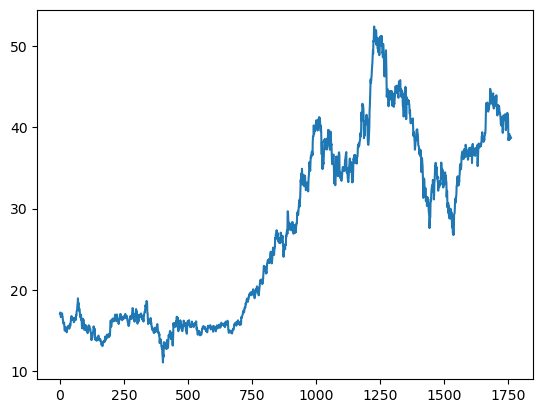

In [9]:
plt.plot(yahoo_stk_prices)
plt.show()

In [15]:
train_size = int(len(yahoo_stk_prices) * 0.80)
test_size = len(yahoo_stk_prices) - train_size
train, test = yahoo_stk_prices[0:train_size], yahoo_stk_prices[train_size:]
print(len(train), len(test))


1409 353


In [19]:
import numpy as np

def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# Assuming 'train' and 'test' are 1D arrays
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [20]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
from keras.layers import LSTM
#Step 2 Build Model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=12))
model.add(Activation('linear'))
start = time.time() 
model.compile(loss='mse', optimizer='rmsprop')
print ('compilation time : ', time.time() - start)

compilation time :  0.014384746551513672


In [22]:
model.fit(trainX,trainY,batch_size=128,epochs=5,validation_split=0.05)

Epoch 1/5
11/11 [==============================] - 5s 92ms/step - loss: 699.7775 - val_loss: 1590.7040
Epoch 2/5
11/11 [==============================] - 0s 9ms/step - loss: 639.4724 - val_loss: 1443.0999
Epoch 3/5
11/11 [==============================] - 0s 10ms/step - loss: 556.7404 - val_loss: 1303.8710
Epoch 4/5
11/11 [==============================] - 0s 10ms/step - loss: 490.4916 - val_loss: 1200.5242
Epoch 5/5
11/11 [==============================] - 0s 10ms/step - loss: 440.6018 - val_loss: 1120.5961


In [35]:
def plt_results_multiple(predicted_data, true_data,length):
    plt.plot(scaler.inverse_transform(true_data.reshape(-1, 1))[length:])
    plt.plot(scaler.inverse_transform(np.array(predicted_data).reshape(-1, 1))[length:])
    plt.show()


In [36]:
#predict length consecutive values from a real one
def predict_sequences_multiple(model, firstValue,length):
    prediction_seqs = []
    curr_frame = firstValue
    for i in range(length): 
        predicted = []        
        print(model.predict(curr_frame[newaxis,:,:]))
        predicted.append(model.predict(curr_frame[newaxis,:,:])[0,0])
        curr_frame = curr_frame[0:]
        curr_frame = np.insert(curr_frame[0:], i+1, predicted[-1], axis=0)
        prediction_seqs.append(predicted[-1])
    return prediction_seqs

In [37]:
predict_length=5
predictions = predict_sequences_multiple(model, testX[0], predict_length)
print(scaler.inverse_transform(np.array(predictions).reshape(-1, 1)))
plt_results_multiple(predictions, testY, predict_length)

1/1 [==============================] - 0s 19ms/step
[[7.40719   9.249417  7.091629  7.096318  6.5751266 6.8795667 6.672777
  6.0446672 7.000446  8.746235  7.316764  7.4453993]]
1/1 [==============================] - 0s 20ms/step
[[ 9.120618  11.322918   8.706851   8.635414   8.060761   8.475283
   8.187101   7.4342346  8.565092  10.744028   8.95614    9.121974 ]]
1/1 [==============================] - 0s 20ms/step
[[ 9.669824  11.983562   9.231171   9.140803   8.545163   8.963996
   8.668799   7.873517   9.0647745 11.371559   9.495036   9.65572  ]]
1/1 [==============================] - 0s 20ms/step
[[ 9.840854 12.191002  9.394882  9.303182  8.695824  9.111904  8.817892
   8.006306  9.220788 11.567539  9.666904  9.821794]]
1/1 [==============================] - 0s 21ms/step
[[ 9.905296  12.269756   9.456602   9.365772   8.752056   9.1659155
   8.873836   8.054235   9.279631  11.641964   9.733035   9.884316 ]]
1/1 [==============================] - 0s 20ms/step


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.